In [14]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np
import yaml

# Set style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

In [22]:
# Load data from all wandb runs
wandb_dir = Path('results/wandb')
runs_data = []

for run_dir in wandb_dir.iterdir():
    if run_dir.is_dir() and run_dir.name.startswith('run-'):
        summary_file = run_dir / 'files' / 'wandb-summary.json'
        config_file = run_dir / 'files' / 'config.yaml'
        
        if summary_file.exists() and config_file.exists():
            with open(summary_file, 'r') as f:
                summary = json.load(f)
            
            with open(config_file, 'r') as f:
                config = yaml.safe_load(f)
            
            # Extract key metrics and architecture details
            run_info = {
                'run_id': run_dir.name,
                'test_acc': summary.get('test_acc', summary.get('summary/test_acc')),
                'test_loss': summary.get('test_loss', summary.get('summary/test_loss')),
                'val_acc': summary.get('val_acc'),
                'val_loss': summary.get('val_loss'),
                'train_acc': summary.get('train_acc'),
                'train_loss': summary.get('train_loss'),
                'best_val_acc': summary.get('best_val_acc', summary.get('summary/best_val_acc')),
                'best_epoch': summary.get('best_epoch'),
                'runtime': summary.get('_runtime', summary.get('_wandb', {}).get('runtime')),
                'learning_rate': config.get('learning_rate', {}).get('value'),
                'batch_size': config.get('batch_size', {}).get('value'),
                'dropout': config.get('dropout', {}).get('value'),
                'weight_decay': config.get('weight_decay', {}).get('value'),
                'optimizer': config.get('optimizer', {}).get('value'),
                'architecture': config.get('architecture', {}).get('value'),
                'improvements': config.get('improvements', {}).get('value', ''),
                # Architecture details
                'loss_function': config.get('loss', {}).get('value'),
                'embedding_dim': config.get('embedding_dim', {}).get('value'),
                'scheduler': config.get('scheduler', {}).get('value'),
                'step_size': config.get('step_size', {}).get('value'),
                'gamma': config.get('gamma', {}).get('value'),
                'similarity_channels': config.get('similarity_channels', {}).get('value'),
                'epochs': config.get('epochs', {}).get('value')
            }
            runs_data.append(run_info)

# Create DataFrame
df = pd.DataFrame(runs_data)
# Remove runs with missing critical data
df = df.dropna(subset=['test_acc', 'test_loss'])
print(f"Loaded {len(df)} complete runs")
df

Loaded 8 complete runs


,run_id,test_acc,test_loss,val_acc,val_loss,train_acc,train_loss,best_val_acc,best_epoch,runtime,learning_rate,batch_size,dropout,weight_decay,optimizer,architecture,improvements,loss_function,embedding_dim,scheduler,step_size,gamma,similarity_channels,epochs
2,run-20251215_150045-fg3yp8lj,68.3,0.590051,69.090909,0.555086,81.022727,0.428269,69.772727,13.0,266.467655,0.0001,32,None,0.0005,Adam,Siamese Network,,BCE,NaN,StepLR,10,0.1,None,20
3,run-20251219_183432-9ou6x57u,72.9,0.816390,73.409091,0.746376,98.977273,0.041942,75.000000,12.0,287.404680,0.0001,32,None,0.0005,Adam,Siamese Network with BatchNorm + Multi-channel Similarity,"BatchNorm, Multi-channel similarity head, Reduced embedding dim",BCEWithLogits,1024.0,StepLR,10,0.1,None,20
7,run-20251219_185512-nlg0husq,54.1,0.683732,52.272727,0.680239,53.238636,0.745672,53.409091,6.0,166.805869,0.0001,32,None,0.0010,Adam,Siamese Network with BatchNorm + Multi-channel Similarity + Very Strong Regularization + Strong Augmentation,"All 3: Very strong dropout (0.7 FC, 0.6 similarity, 0.2-0.3 conv), Weight decay (0.001), Strong augmentation, Reduced epochs (12), Early stopping (8 epochs patience)",BCEWithLogits,1024.0,StepLR,10,0.1,None,12
9,run-20251219_191944-5lh7ez2v,63.2,0.641880,63.636364,0.640372,57.670455,0.676639,67.045455,15.0,258.331906,0.0001,32,None,0.0010,Adam,Siamese Network with BatchNorm + Multi-channel Similarity + Light Regularization + Strong Augmentation,"BASELINE: Light dropout (0.3 FC/similarity, 0.2-0.3 conv), Weight decay (0.001), Strong augmentation - Expected to overfit (~73% test, ~99% train)",BCEWithLogits,1024.0,StepLR,10,0.1,None,20
11,run-20251219_192927-rcjzlbbw,68.3,0.590051,69.090909,0.555086,81.022727,0.428269,69.772727,13.0,262.828185,0.0001,32,None,0.0005,Adam,Siamese Network,,BCE,NaN,StepLR,10,0.1,None,20
14,run-20251219_193848-hqnw88ut,77.2,0.701974,79.090909,0.625921,99.034091,0.036648,79.545455,18.0,314.740181,0.0001,32,None,0.0005,Adam,Improved Siamese Network,BatchNorm + Multi-Channel Similarity + BCEWithLogitsLoss,BCEWithLogitsLoss,512.0,StepLR,10,0.1,L1 + L2 + Cosine + Dot,20
15,run-20251222_181017-i45ujl51,66.2,0.600069,69.545455,0.583411,62.443182,0.637207,69.772727,17.0,0.000000,0.0001,32,"0.5 (embedding) / 0.5, 0.4 (similarity head)",0.0010,Adam,Improved Siamese Network,BatchNorm + Multi-Channel Similarity + BCEWithLogitsLoss + Higher Dropout,BCEWithLogitsLoss,512.0,StepLR,10,0.1,L1 + L2 + Cosine + Dot,20
17,run-20251222_185539-e0bibsan,73.1,0.531361,75.227273,0.497734,75.056818,0.502392,77.272727,19.0,0.000000,0.0001,32,"0.5 (embedding) / 0.5, 0.4 (similarity head)",0.0010,Adam,Improved Siamese Network,BatchNorm + Multi-Channel Similarity + BCEWithLogitsLoss + Higher Dropout,BCEWithLogitsLoss,512.0,StepLR,10,0.1,L1 + L2 + Cosine + Dot,20


## a. Convergence Times, Final Loss and Accuracy

Metrics across all runs in chronological order.

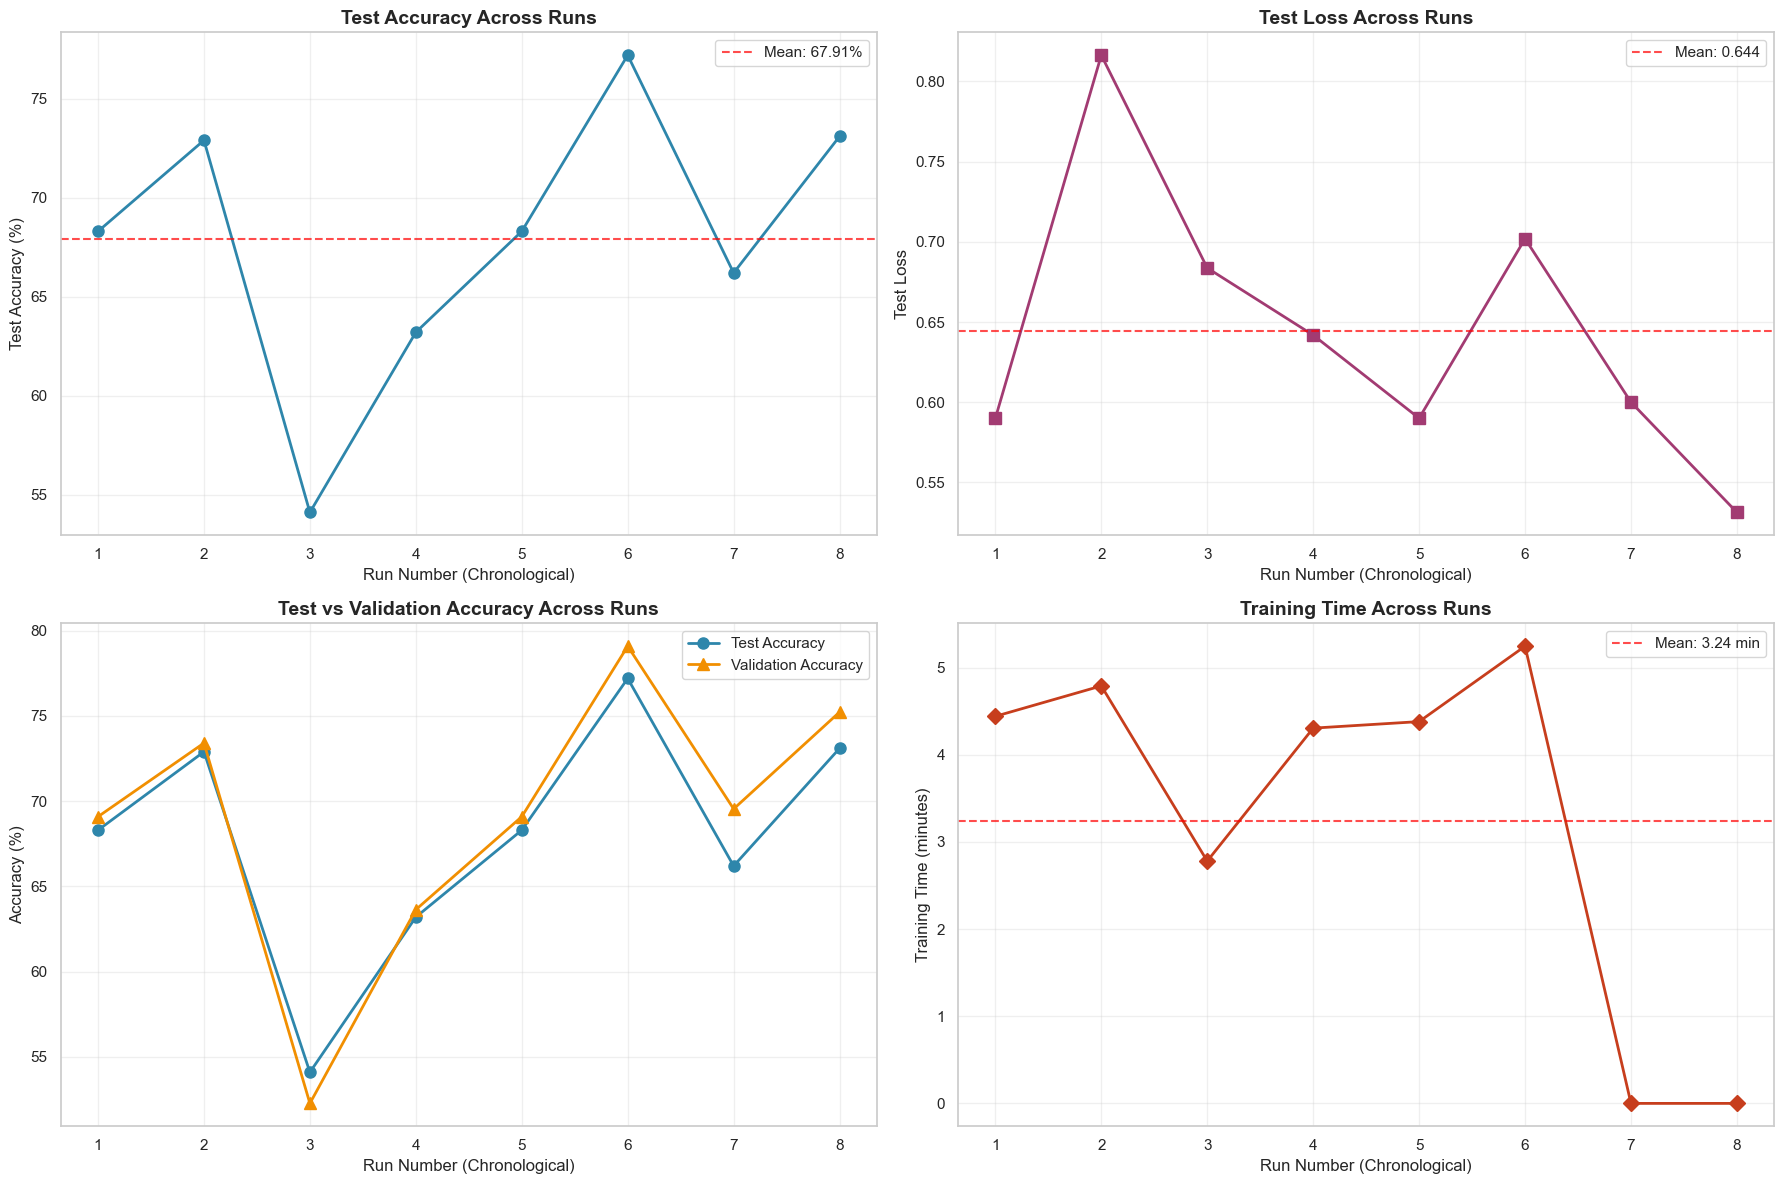


=== Summary Statistics ===
Total Runs: 8
Best Test Accuracy: 77.20% (Run #6)
Mean Test Accuracy: 67.91% (±7.11%)
Best Test Loss: 0.5314 (Run #8)
Mean Test Loss: 0.6444 (±0.0887)
Average Training Time: 3.24 minutes


In [10]:
# Sort runs chronologically by run_id (contains timestamp)
df_sorted = df.sort_values('run_id').reset_index(drop=True)
run_numbers = range(1, len(df_sorted) + 1)

# Create plots with runs on x-axis
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Test Accuracy Across Runs
axes[0, 0].plot(run_numbers, df_sorted['test_acc'], marker='o', linewidth=2, markersize=8, color='#2E86AB')
axes[0, 0].set_xlabel('Run Number (Chronological)', fontsize=12)
axes[0, 0].set_ylabel('Test Accuracy (%)', fontsize=12)
axes[0, 0].set_title('Test Accuracy Across Runs', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(df_sorted['test_acc'].mean(), color='red', linestyle='--', alpha=0.7, label=f'Mean: {df_sorted["test_acc"].mean():.2f}%')
axes[0, 0].legend()

# 2. Test Loss Across Runs
axes[0, 1].plot(run_numbers, df_sorted['test_loss'], marker='s', linewidth=2, markersize=8, color='#A23B72')
axes[0, 1].set_xlabel('Run Number (Chronological)', fontsize=12)
axes[0, 1].set_ylabel('Test Loss', fontsize=12)
axes[0, 1].set_title('Test Loss Across Runs', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axhline(df_sorted['test_loss'].mean(), color='red', linestyle='--', alpha=0.7, label=f'Mean: {df_sorted["test_loss"].mean():.3f}')
axes[0, 1].legend()

# 3. Validation and Test Accuracy Comparison
val_data = df_sorted[df_sorted['val_acc'].notna()]
val_run_numbers = [i+1 for i, idx in enumerate(df_sorted.index) if df_sorted.loc[idx, 'val_acc'] == df_sorted.loc[idx, 'val_acc']]
axes[1, 0].plot(run_numbers, df_sorted['test_acc'], marker='o', linewidth=2, markersize=8, label='Test Accuracy', color='#2E86AB')
if not val_data.empty:
    axes[1, 0].plot(val_run_numbers, val_data['val_acc'], marker='^', linewidth=2, markersize=8, label='Validation Accuracy', color='#F18F01')
axes[1, 0].set_xlabel('Run Number (Chronological)', fontsize=12)
axes[1, 0].set_ylabel('Accuracy (%)', fontsize=12)
axes[1, 0].set_title('Test vs Validation Accuracy Across Runs', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

# 4. Training Time (Runtime) Across Runs
runtime_data = df_sorted[df_sorted['runtime'].notna()]
if not runtime_data.empty:
    runtime_run_numbers = [i+1 for i, idx in enumerate(df_sorted.index) if df_sorted.loc[idx, 'runtime'] == df_sorted.loc[idx, 'runtime']]
    axes[1, 1].plot(runtime_run_numbers, runtime_data['runtime'] / 60, marker='D', linewidth=2, markersize=8, color='#C73E1D')
    axes[1, 1].set_xlabel('Run Number (Chronological)', fontsize=12)
    axes[1, 1].set_ylabel('Training Time (minutes)', fontsize=12)
    axes[1, 1].set_title('Training Time Across Runs', fontsize=14, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].axhline(runtime_data['runtime'].mean() / 60, color='red', linestyle='--', alpha=0.7, 
                       label=f'Mean: {runtime_data["runtime"].mean() / 60:.2f} min')
    axes[1, 1].legend()
else:
    axes[1, 1].text(0.5, 0.5, 'No runtime data available', ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_xlabel('Run Number (Chronological)', fontsize=12)
    axes[1, 1].set_ylabel('Training Time (minutes)', fontsize=12)
    axes[1, 1].set_title('Training Time Across Runs', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('results/convergence_and_final_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\n=== Summary Statistics ===")
print(f"Total Runs: {len(df_sorted)}")
print(f"Best Test Accuracy: {df_sorted['test_acc'].max():.2f}% (Run #{df_sorted['test_acc'].idxmax() + 1})")
print(f"Mean Test Accuracy: {df_sorted['test_acc'].mean():.2f}% (±{df_sorted['test_acc'].std():.2f}%)")
print(f"Best Test Loss: {df_sorted['test_loss'].min():.4f} (Run #{df_sorted['test_loss'].idxmin() + 1})")
print(f"Mean Test Loss: {df_sorted['test_loss'].mean():.4f} (±{df_sorted['test_loss'].std():.4f})")
if not runtime_data.empty:
    print(f"Average Training Time: {runtime_data['runtime'].mean() / 60:.2f} minutes")

## b. Training Loss Throughout Training Process

Visualizing loss curves from the best performing runs.

In [ ]:
# Load training results JSON for detailed training history
training_results_file = Path('results/training_results.json')

if training_results_file.exists():
    with open(training_results_file, 'r') as f:
        training_results = json.load(f)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Training and Validation Loss
    epochs = range(1, len(training_results['training_history']['train_loss']) + 1)
    
    axes[0].plot(epochs, training_results['training_history']['train_loss'], 
                 label='Training Loss', marker='o', linewidth=2)
    axes[0].plot(epochs, training_results['training_history']['val_loss'], 
                 label='Validation Loss', marker='s', linewidth=2)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Training and Validation Loss Over Epochs')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Training and Validation Accuracy
    axes[1].plot(epochs, training_results['training_history']['train_acc'], 
                 label='Training Accuracy', marker='o', linewidth=2)
    axes[1].plot(epochs, training_results['training_history']['val_acc'], 
                 label='Validation Accuracy', marker='s', linewidth=2)
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy (%)')
    axes[1].set_title('Training and Validation Accuracy Over Epochs')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('results/training_curves.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\nBest Validation Accuracy: {training_results['results']['best_val_acc']:.2f}%")
    print(f"Final Test Accuracy: {training_results['results']['test_acc']:.2f}%")
    print(f"Final Test Loss: {training_results['results']['test_loss']:.4f}")
else:
    print("Training results file not found. Skipping detailed training curves.")

## c. Performance with Various Parameters

Analyzing how different hyperparameters affect model performance across runs.

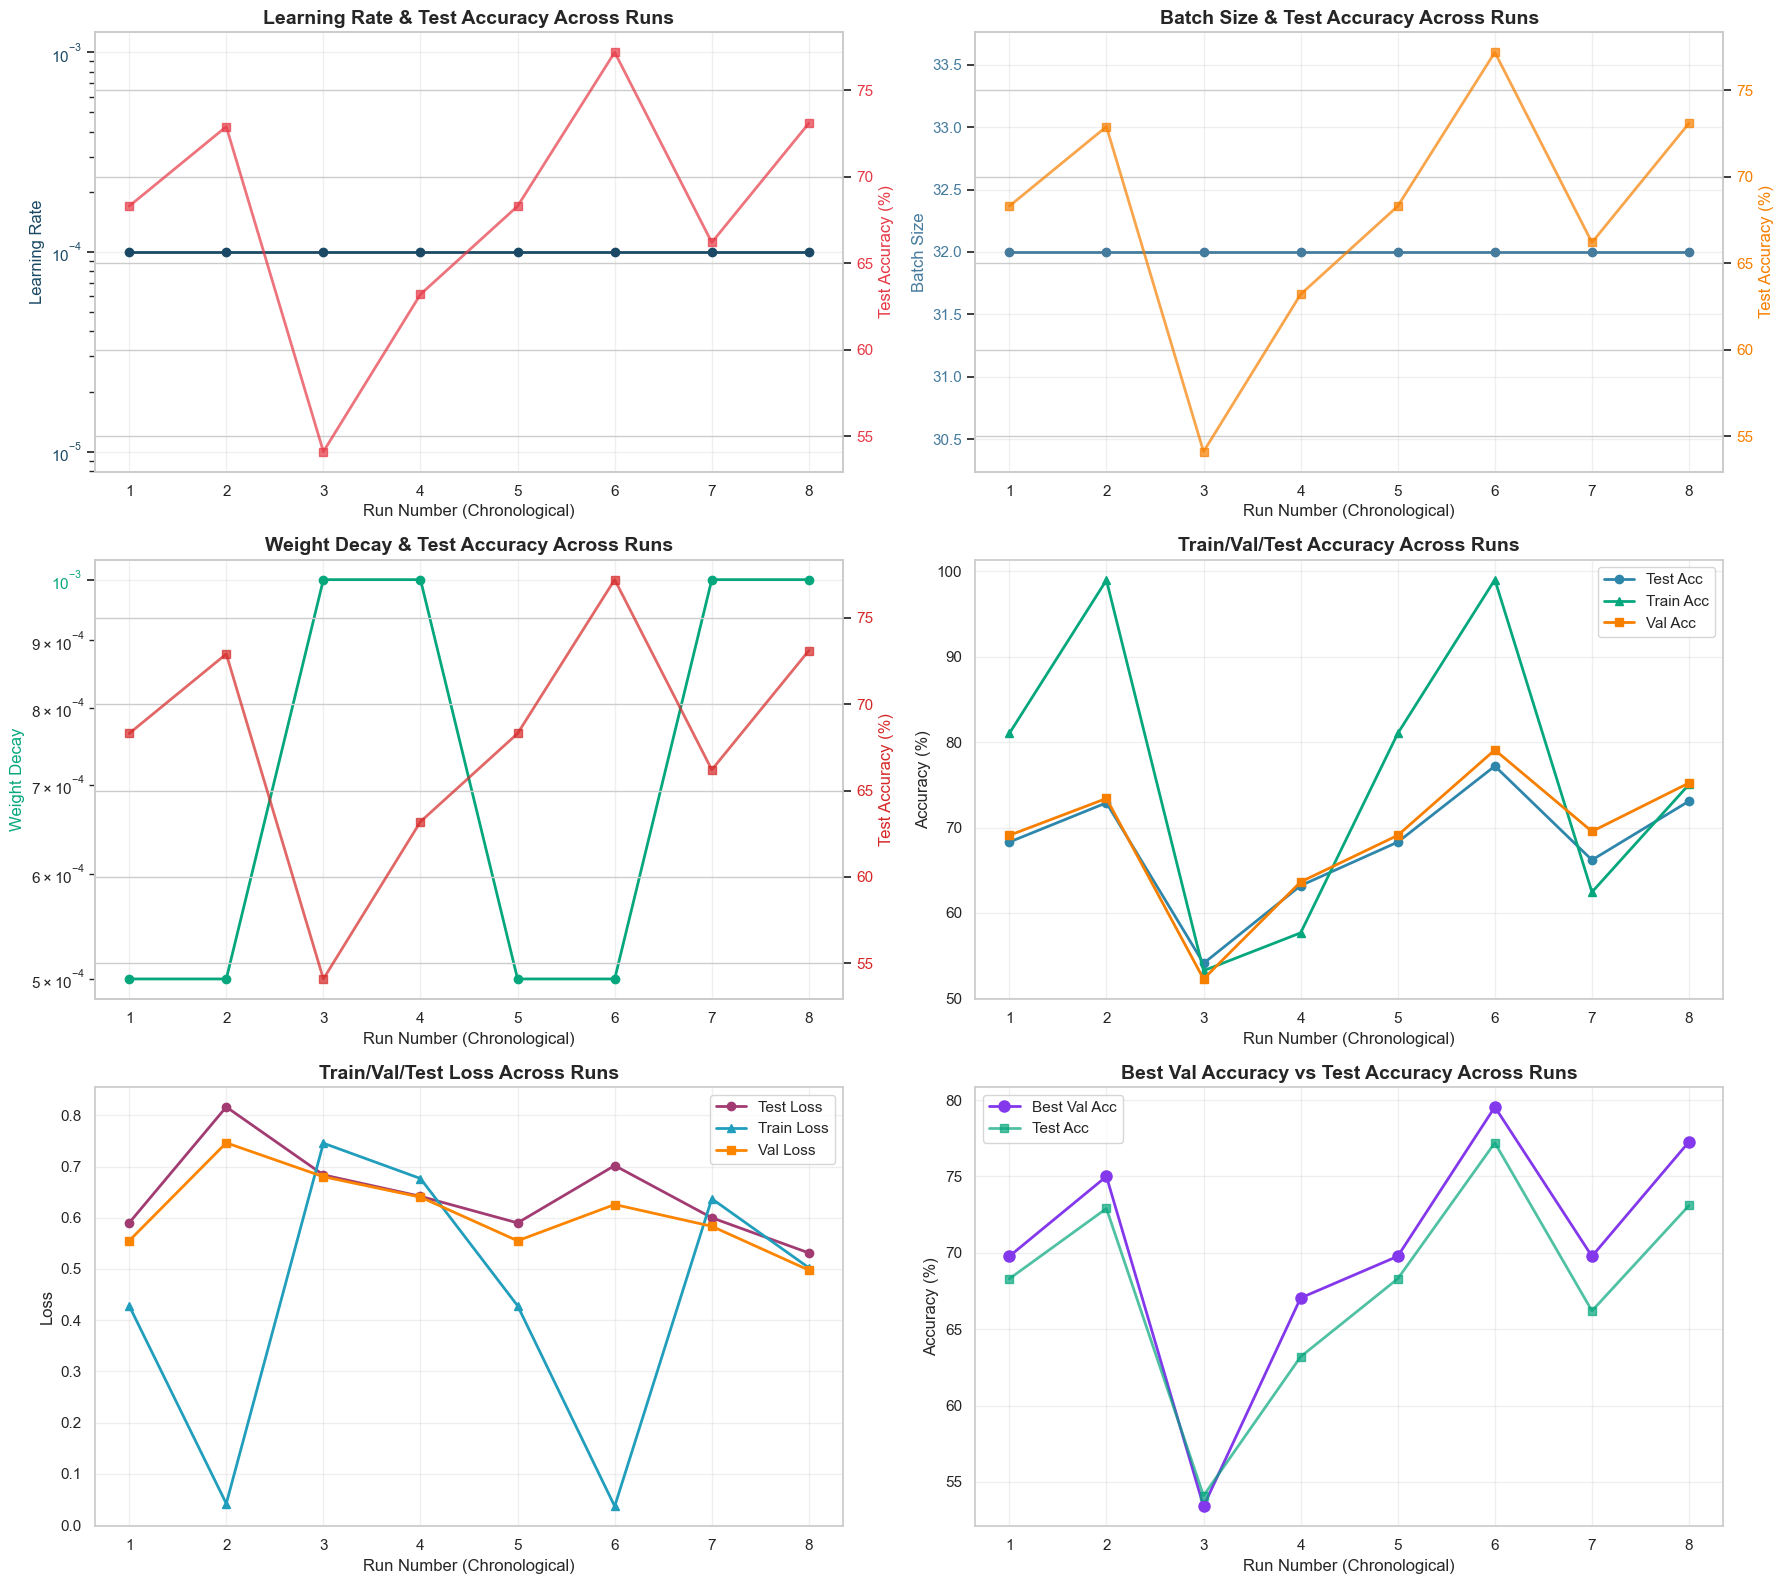

In [11]:
# Plot metrics with different hyperparameters across runs
fig, axes = plt.subplots(3, 2, figsize=(18, 16))

# Sort by run_id for chronological order
df_sorted = df.sort_values('run_id').reset_index(drop=True)
run_numbers = range(1, len(df_sorted) + 1)

# 1. Learning Rate across runs
lr_df = df_sorted[df_sorted['learning_rate'].notna()]
if not lr_df.empty:
    lr_run_nums = [i+1 for i, idx in enumerate(df_sorted.index) if df_sorted.loc[idx, 'learning_rate'] == df_sorted.loc[idx, 'learning_rate']]
    axes[0, 0].plot(lr_run_nums, lr_df['learning_rate'], marker='o', linewidth=2, label='Learning Rate', color='#1B4965')
    ax2 = axes[0, 0].twinx()
    ax2.plot(lr_run_nums, lr_df['test_acc'], marker='s', linewidth=2, label='Test Acc', color='#E63946', alpha=0.7)
    axes[0, 0].set_xlabel('Run Number (Chronological)', fontsize=12)
    axes[0, 0].set_ylabel('Learning Rate', fontsize=12, color='#1B4965')
    ax2.set_ylabel('Test Accuracy (%)', fontsize=12, color='#E63946')
    axes[0, 0].set_title('Learning Rate & Test Accuracy Across Runs', fontsize=14, fontweight='bold')
    axes[0, 0].tick_params(axis='y', labelcolor='#1B4965')
    ax2.tick_params(axis='y', labelcolor='#E63946')
    axes[0, 0].set_yscale('log')
    axes[0, 0].grid(True, alpha=0.3)

# 2. Batch Size across runs
bs_df = df_sorted[df_sorted['batch_size'].notna()]
if not bs_df.empty:
    bs_run_nums = [i+1 for i, idx in enumerate(df_sorted.index) if df_sorted.loc[idx, 'batch_size'] == df_sorted.loc[idx, 'batch_size']]
    axes[0, 1].plot(bs_run_nums, bs_df['batch_size'], marker='o', linewidth=2, label='Batch Size', color='#457B9D')
    ax2 = axes[0, 1].twinx()
    ax2.plot(bs_run_nums, bs_df['test_acc'], marker='s', linewidth=2, label='Test Acc', color='#F77F00', alpha=0.7)
    axes[0, 1].set_xlabel('Run Number (Chronological)', fontsize=12)
    axes[0, 1].set_ylabel('Batch Size', fontsize=12, color='#457B9D')
    ax2.set_ylabel('Test Accuracy (%)', fontsize=12, color='#F77F00')
    axes[0, 1].set_title('Batch Size & Test Accuracy Across Runs', fontsize=14, fontweight='bold')
    axes[0, 1].tick_params(axis='y', labelcolor='#457B9D')
    ax2.tick_params(axis='y', labelcolor='#F77F00')
    axes[0, 1].grid(True, alpha=0.3)

# 3. Weight Decay across runs
wd_df = df_sorted[df_sorted['weight_decay'].notna()]
if not wd_df.empty:
    wd_run_nums = [i+1 for i, idx in enumerate(df_sorted.index) if df_sorted.loc[idx, 'weight_decay'] == df_sorted.loc[idx, 'weight_decay']]
    axes[1, 0].plot(wd_run_nums, wd_df['weight_decay'], marker='o', linewidth=2, label='Weight Decay', color='#06A77D')
    ax2 = axes[1, 0].twinx()
    ax2.plot(wd_run_nums, wd_df['test_acc'], marker='s', linewidth=2, label='Test Acc', color='#D62828', alpha=0.7)
    axes[1, 0].set_xlabel('Run Number (Chronological)', fontsize=12)
    axes[1, 0].set_ylabel('Weight Decay', fontsize=12, color='#06A77D')
    ax2.set_ylabel('Test Accuracy (%)', fontsize=12, color='#D62828')
    axes[1, 0].set_title('Weight Decay & Test Accuracy Across Runs', fontsize=14, fontweight='bold')
    axes[1, 0].tick_params(axis='y', labelcolor='#06A77D')
    ax2.tick_params(axis='y', labelcolor='#D62828')
    axes[1, 0].set_yscale('log')
    axes[1, 0].grid(True, alpha=0.3)

# 4. Train vs Val vs Test Accuracy across runs
axes[1, 1].plot(run_numbers, df_sorted['test_acc'], marker='o', linewidth=2, markersize=6, label='Test Acc', color='#2E86AB')
train_df = df_sorted[df_sorted['train_acc'].notna()]
if not train_df.empty:
    train_run_nums = [i+1 for i, idx in enumerate(df_sorted.index) if df_sorted.loc[idx, 'train_acc'] == df_sorted.loc[idx, 'train_acc']]
    axes[1, 1].plot(train_run_nums, train_df['train_acc'], marker='^', linewidth=2, markersize=6, label='Train Acc', color='#06A77D')
val_df = df_sorted[df_sorted['val_acc'].notna()]
if not val_df.empty:
    val_run_nums = [i+1 for i, idx in enumerate(df_sorted.index) if df_sorted.loc[idx, 'val_acc'] == df_sorted.loc[idx, 'val_acc']]
    axes[1, 1].plot(val_run_nums, val_df['val_acc'], marker='s', linewidth=2, markersize=6, label='Val Acc', color='#F77F00')
axes[1, 1].set_xlabel('Run Number (Chronological)', fontsize=12)
axes[1, 1].set_ylabel('Accuracy (%)', fontsize=12)
axes[1, 1].set_title('Train/Val/Test Accuracy Across Runs', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 5. Train vs Test Loss across runs
axes[2, 0].plot(run_numbers, df_sorted['test_loss'], marker='o', linewidth=2, markersize=6, label='Test Loss', color='#A23B72')
train_loss_df = df_sorted[df_sorted['train_loss'].notna()]
if not train_loss_df.empty:
    train_loss_run_nums = [i+1 for i, idx in enumerate(df_sorted.index) if df_sorted.loc[idx, 'train_loss'] == df_sorted.loc[idx, 'train_loss']]
    axes[2, 0].plot(train_loss_run_nums, train_loss_df['train_loss'], marker='^', linewidth=2, markersize=6, label='Train Loss', color='#219EBC')
val_loss_df = df_sorted[df_sorted['val_loss'].notna()]
if not val_loss_df.empty:
    val_loss_run_nums = [i+1 for i, idx in enumerate(df_sorted.index) if df_sorted.loc[idx, 'val_loss'] == df_sorted.loc[idx, 'val_loss']]
    axes[2, 0].plot(val_loss_run_nums, val_loss_df['val_loss'], marker='s', linewidth=2, markersize=6, label='Val Loss', color='#FB8500')
axes[2, 0].set_xlabel('Run Number (Chronological)', fontsize=12)
axes[2, 0].set_ylabel('Loss', fontsize=12)
axes[2, 0].set_title('Train/Val/Test Loss Across Runs', fontsize=14, fontweight='bold')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)

# 6. Best Validation Accuracy across runs
best_val_df = df_sorted[df_sorted['best_val_acc'].notna()]
if not best_val_df.empty:
    best_val_run_nums = [i+1 for i, idx in enumerate(df_sorted.index) if df_sorted.loc[idx, 'best_val_acc'] == df_sorted.loc[idx, 'best_val_acc']]
    axes[2, 1].plot(best_val_run_nums, best_val_df['best_val_acc'], marker='o', linewidth=2, markersize=8, label='Best Val Acc', color='#8338EC')
    axes[2, 1].plot(run_numbers, df_sorted['test_acc'], marker='s', linewidth=2, markersize=6, label='Test Acc', color='#06A77D', alpha=0.7)
    axes[2, 1].set_xlabel('Run Number (Chronological)', fontsize=12)
    axes[2, 1].set_ylabel('Accuracy (%)', fontsize=12)
    axes[2, 1].set_title('Best Val Accuracy vs Test Accuracy Across Runs', fontsize=14, fontweight='bold')
    axes[2, 1].legend()
    axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('results/hyperparameter_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# Show top 5 best performing configurations
print("\n=== Top 5 Best Performing Runs ===")
top_5 = df.nlargest(5, 'test_acc')[['run_id', 'test_acc', 'test_loss', 'best_val_acc', 
                                      'learning_rate', 'batch_size', 'dropout', 'optimizer']]
print(top_5.to_string(index=False))

# Correlation analysis
print("\n=== Correlation with Test Accuracy ===")
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numeric_cols].corr()['test_acc'].sort_values(ascending=False)
print(correlations[correlations.index != 'test_acc'])


=== Top 5 Best Performing Runs ===
                      run_id  test_acc  test_loss  best_val_acc  learning_rate  batch_size                                      dropout optimizer
run-20251219_193848-hqnw88ut      77.2   0.701974     79.545455         0.0001          32                                         None      Adam
run-20251222_185539-e0bibsan      73.1   0.531361     77.272727         0.0001          32 0.5 (embedding) / 0.5, 0.4 (similarity head)      Adam
run-20251219_183432-9ou6x57u      72.9   0.816390     75.000000         0.0001          32                                         None      Adam
run-20251215_150045-fg3yp8lj      68.3   0.590051     69.772727         0.0001          32                                         None      Adam
run-20251219_192927-rcjzlbbw      68.3   0.590051     69.772727         0.0001          32                                         None      Adam

=== Correlation with Test Accuracy ===
val_acc          0.989956
best_val_acc     0.985

In [13]:
# Save summary to CSV
summary_df = df[['run_id', 'test_acc', 'test_loss', 'val_acc', 'best_val_acc', 
                  'learning_rate', 'batch_size', 'dropout', 'weight_decay', 
                  'optimizer', 'architecture', 'runtime']]
summary_df.to_csv('results/runs_analysis_summary.csv', index=False)
print("\nSummary saved to results/runs_analysis_summary.csv")


Summary saved to results/runs_analysis_summary.csv


## Detailed Run Data

In [21]:
# Display all data for each of the 8 runs
import pandas as pd

# Set display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("=" * 100)
print("DETAILED DATA FOR ALL 8 RUNS")
print("=" * 100)

# Sort by run_id to show chronologically
df_display = df.sort_values('run_id').reset_index(drop=True)

# Display each run's data
for idx, row in df_display.iterrows():
    print(f"\n{'='*100}")
    print(f"RUN #{idx + 1}: {row['run_id']}")
    print(f"{'='*100}")
    
    print("\n📊 PERFORMANCE METRICS:")
    print(f"  Test Accuracy:        {row['test_acc']:.2f}%" if pd.notna(row['test_acc']) else "  Test Accuracy:        N/A")
    print(f"  Test Loss:            {row['test_loss']:.4f}" if pd.notna(row['test_loss']) else "  Test Loss:            N/A")
    print(f"  Validation Accuracy:  {row['val_acc']:.2f}%" if pd.notna(row['val_acc']) else "  Validation Accuracy:  N/A")
    print(f"  Validation Loss:      {row['val_loss']:.4f}" if pd.notna(row['val_loss']) else "  Validation Loss:      N/A")
    print(f"  Train Accuracy:       {row['train_acc']:.2f}%" if pd.notna(row['train_acc']) else "  Train Accuracy:       N/A")
    print(f"  Train Loss:           {row['train_loss']:.4f}" if pd.notna(row['train_loss']) else "  Train Loss:           N/A")
    print(f"  Best Val Accuracy:    {row['best_val_acc']:.2f}%" if pd.notna(row['best_val_acc']) else "  Best Val Accuracy:    N/A")
    print(f"  Best Epoch:           {int(row['best_epoch'])}" if pd.notna(row['best_epoch']) else "  Best Epoch:           N/A")
    
    print("\n⚙️  HYPERPARAMETERS:")
    print(f"  Learning Rate:        {row['learning_rate']}" if pd.notna(row['learning_rate']) else "  Learning Rate:        N/A")
    print(f"  Batch Size:           {int(row['batch_size'])}" if pd.notna(row['batch_size']) else "  Batch Size:           N/A")
    print(f"  Dropout:              {row['dropout']}" if pd.notna(row['dropout']) else "  Dropout:              N/A")
    print(f"  Weight Decay:         {row['weight_decay']}" if pd.notna(row['weight_decay']) else "  Weight Decay:         N/A")
    print(f"  Optimizer:            {row['optimizer']}" if pd.notna(row['optimizer']) else "  Optimizer:            N/A")
    
    print("\n🏗️  MODEL ARCHITECTURE:")
    print(f"  Architecture:         {row['architecture']}" if pd.notna(row['architecture']) else "  Architecture:         N/A")
    print(f"  Improvements:         {row['improvements']}" if pd.notna(row['improvements']) and row['improvements'] else "  Improvements:         N/A")
    print(f"  Loss Function:        {row['loss_function']}" if pd.notna(row['loss_function']) else "  Loss Function:        N/A")
    print(f"  Embedding Dimension:  {int(row['embedding_dim'])}" if pd.notna(row['embedding_dim']) else "  Embedding Dimension:  N/A")
    print(f"  Similarity Channels:  {row['similarity_channels']}" if pd.notna(row['similarity_channels']) else "  Similarity Channels:  N/A")
    
    print("\n📅 TRAINING SCHEDULE:")
    print(f"  Total Epochs:         {int(row['epochs'])}" if pd.notna(row['epochs']) else "  Total Epochs:         N/A")
    print(f"  LR Scheduler:         {row['scheduler']}" if pd.notna(row['scheduler']) else "  LR Scheduler:         N/A")
    print(f"  Scheduler Step Size:  {int(row['step_size'])}" if pd.notna(row['step_size']) else "  Scheduler Step Size:  N/A")
    print(f"  Scheduler Gamma:      {row['gamma']}" if pd.notna(row['gamma']) else "  Scheduler Gamma:      N/A")
    
    print("\n⏱️  RUNTIME:")
    if pd.notna(row['runtime']):
        runtime_min = row['runtime'] / 60
        print(f"  Total Runtime:        {runtime_min:.2f} minutes ({row['runtime']:.1f} seconds)")
    else:
        print(f"  Total Runtime:        N/A")

print(f"\n{'='*100}")
print("SUMMARY STATISTICS")
print(f"{'='*100}")
print(f"\nTotal runs analyzed: {len(df_display)}")
print(f"Best test accuracy: {df_display['test_acc'].max():.2f}% (Run #{df_display['test_acc'].idxmax() + 1})")
print(f"Worst test accuracy: {df_display['test_acc'].min():.2f}% (Run #{df_display['test_acc'].idxmin() + 1})")
print(f"Mean test accuracy: {df_display['test_acc'].mean():.2f}% ± {df_display['test_acc'].std():.2f}%")
print(f"Best test loss: {df_display['test_loss'].min():.4f} (Run #{df_display['test_loss'].idxmin() + 1})")
print(f"Mean runtime: {(df_display['runtime'].mean() / 60):.2f} minutes")

# Also display as a table
print(f"\n{'='*100}")
print("QUICK REFERENCE TABLE")
print(f"{'='*100}\n")
display(df_display[['run_id', 'test_acc', 'test_loss', 'val_acc', 'best_val_acc', 'learning_rate', 'batch_size', 'weight_decay', 'dropout']])

DETAILED DATA FOR ALL 8 RUNS

RUN #1: run-20251215_150045-fg3yp8lj

📊 PERFORMANCE METRICS:
  Test Accuracy:        68.30%
  Test Loss:            0.5901
  Validation Accuracy:  69.09%
  Validation Loss:      0.5551
  Train Accuracy:       81.02%
  Train Loss:           0.4283
  Best Val Accuracy:    69.77%
  Best Epoch:           13

⚙️  HYPERPARAMETERS:
  Learning Rate:        0.0001
  Batch Size:           32
  Dropout:              N/A
  Weight Decay:         0.0005
  Optimizer:            Adam

🏗️  MODEL ARCHITECTURE:
  Architecture:         Siamese Network
  Improvements:         N/A
  Loss Function:        BCE
  Embedding Dimension:  N/A
  Similarity Channels:  N/A

📅 TRAINING SCHEDULE:
  Total Epochs:         20
  LR Scheduler:         StepLR
  Scheduler Step Size:  10
  Scheduler Gamma:      0.1

⏱️  RUNTIME:
  Total Runtime:        4.44 minutes (266.5 seconds)

RUN #2: run-20251219_183432-9ou6x57u

📊 PERFORMANCE METRICS:
  Test Accuracy:        72.90%
  Test Loss:            0

,run_id,test_acc,test_loss,val_acc,best_val_acc,learning_rate,batch_size,weight_decay,dropout
0,run-20251215_150045-fg3yp8lj,68.3,0.590051,69.090909,69.772727,0.0001,32,0.0005,None
1,run-20251219_183432-9ou6x57u,72.9,0.816390,73.409091,75.000000,0.0001,32,0.0005,None
2,run-20251219_185512-nlg0husq,54.1,0.683732,52.272727,53.409091,0.0001,32,0.0010,None
3,run-20251219_191944-5lh7ez2v,63.2,0.641880,63.636364,67.045455,0.0001,32,0.0010,None
4,run-20251219_192927-rcjzlbbw,68.3,0.590051,69.090909,69.772727,0.0001,32,0.0005,None
5,run-20251219_193848-hqnw88ut,77.2,0.701974,79.090909,79.545455,0.0001,32,0.0005,None
6,run-20251222_181017-i45ujl51,66.2,0.600069,69.545455,69.772727,0.0001,32,0.0010,"0.5 (embedding) / 0.5, 0.4 (similarity head)"
7,run-20251222_185539-e0bibsan,73.1,0.531361,75.227273,77.272727,0.0001,32,0.0010,"0.5 (embedding) / 0.5, 0.4 (similarity head)"


## Per-Epoch Training History

In [20]:
# Display architecture details for all runs
print("=" * 120)
print("MODEL ARCHITECTURE COMPARISON")
print("=" * 120)

arch_columns = ['run_id', 'test_acc', 'architecture', 'improvements', 'loss_function', 
                'embedding_dim', 'similarity_channels', 'dropout', 'epochs', 
                'scheduler', 'step_size', 'gamma']

# Filter to available columns
available_arch_cols = [col for col in arch_columns if col in df_sorted.columns]
arch_df = df_sorted[available_arch_cols].copy()

# Format for better display
arch_df['run_num'] = range(1, len(arch_df) + 1)
arch_df = arch_df[['run_num'] + available_arch_cols]

print("\n📊 Architecture Details Table:\n")
display(arch_df)

# Analyze what changed between runs
print("\n" + "=" * 120)
print("KEY ARCHITECTURE DIFFERENCES")
print("=" * 120)

# Check for BatchNorm usage
print("\n🔍 BatchNorm Usage:")
for idx, row in df_sorted.iterrows():
    improvements = row.get('improvements', '')
    has_batchnorm = 'BatchNorm' in str(improvements) if pd.notna(improvements) else False
    status = "✓ YES" if has_batchnorm else "✗ NO"
    print(f"  Run #{idx + 1}: {status} - {improvements if pd.notna(improvements) else 'N/A'}")

# Loss function evolution
print("\n📉 Loss Function:")
loss_funcs = df_sorted['loss_function'].value_counts() if 'loss_function' in df_sorted.columns else {}
for loss, count in loss_funcs.items():
    print(f"  {loss}: {count} runs")

# Embedding dimensions
print("\n🧠 Embedding Dimensions:")
if 'embedding_dim' in df_sorted.columns:
    emb_dims = df_sorted['embedding_dim'].value_counts()
    for dim, count in emb_dims.items():
        if pd.notna(dim):
            print(f"  {int(dim)}: {count} runs")

# Similarity channels
print("\n🔗 Similarity Channel Configurations:")
if 'similarity_channels' in df_sorted.columns:
    sim_channels = df_sorted['similarity_channels'].value_counts()
    for channels, count in sim_channels.items():
        if pd.notna(channels):
            print(f"  {channels}: {count} runs")

# Architecture versions
print("\n🏗️  Architecture Versions:")
arch_versions = df_sorted.groupby(['architecture', 'improvements']).size().reset_index(name='count')
for _, row in arch_versions.iterrows():
    if pd.notna(row['architecture']):
        improvements = row['improvements'] if pd.notna(row['improvements']) and row['improvements'] else 'None'
        print(f"  {row['architecture']} ({improvements}): {row['count']} runs")

MODEL ARCHITECTURE COMPARISON

📊 Architecture Details Table:



,run_num,run_id,test_acc,architecture,improvements,dropout
0,1,run-20251215_150045-fg3yp8lj,68.3,Siamese Network,,None
1,2,run-20251219_183432-9ou6x57u,72.9,Siamese Network with BatchNorm + Multi-channel Similarity,"BatchNorm, Multi-channel similarity head, Reduced embedding dim",None
2,3,run-20251219_185512-nlg0husq,54.1,Siamese Network with BatchNorm + Multi-channel Similarity + Very Strong Regularization + Strong Augmentation,"All 3: Very strong dropout (0.7 FC, 0.6 similarity, 0.2-0.3 conv), Weight decay (0.001), Strong augmentation, Reduced epochs (12), Early stopping (8 epochs patience)",None
3,4,run-20251219_191944-5lh7ez2v,63.2,Siamese Network with BatchNorm + Multi-channel Similarity + Light Regularization + Strong Augmentation,"BASELINE: Light dropout (0.3 FC/similarity, 0.2-0.3 conv), Weight decay (0.001), Strong augmentation - Expected to overfit (~73% test, ~99% train)",None
4,5,run-20251219_192927-rcjzlbbw,68.3,Siamese Network,,None
5,6,run-20251219_193848-hqnw88ut,77.2,Improved Siamese Network,BatchNorm + Multi-Channel Similarity + BCEWithLogitsLoss,None
6,7,run-20251222_181017-i45ujl51,66.2,Improved Siamese Network,BatchNorm + Multi-Channel Similarity + BCEWithLogitsLoss + Higher Dropout,"0.5 (embedding) / 0.5, 0.4 (similarity head)"
7,8,run-20251222_185539-e0bibsan,73.1,Improved Siamese Network,BatchNorm + Multi-Channel Similarity + BCEWithLogitsLoss + Higher Dropout,"0.5 (embedding) / 0.5, 0.4 (similarity head)"



KEY ARCHITECTURE DIFFERENCES

🔍 BatchNorm Usage:
  Run #1: ✗ NO - 
  Run #2: ✓ YES - BatchNorm, Multi-channel similarity head, Reduced embedding dim
  Run #3: ✗ NO - All 3: Very strong dropout (0.7 FC, 0.6 similarity, 0.2-0.3 conv), Weight decay (0.001), Strong augmentation, Reduced epochs (12), Early stopping (8 epochs patience)
  Run #4: ✗ NO - BASELINE: Light dropout (0.3 FC/similarity, 0.2-0.3 conv), Weight decay (0.001), Strong augmentation - Expected to overfit (~73% test, ~99% train)
  Run #5: ✗ NO - 
  Run #6: ✓ YES - BatchNorm + Multi-Channel Similarity + BCEWithLogitsLoss
  Run #7: ✓ YES - BatchNorm + Multi-Channel Similarity + BCEWithLogitsLoss + Higher Dropout
  Run #8: ✓ YES - BatchNorm + Multi-Channel Similarity + BCEWithLogitsLoss + Higher Dropout

📉 Loss Function:

🧠 Embedding Dimensions:

🔗 Similarity Channel Configurations:

🏗️  Architecture Versions:
  Improved Siamese Network (BatchNorm + Multi-Channel Similarity + BCEWithLogitsLoss): 1 runs
  Improved Siamese Netw

## Model Architecture Comparison

In [17]:
# Extract per-epoch training history from wandb runs
import wandb

# Initialize wandb API
api = wandb.Api()

print("Fetching per-epoch data for all 8 runs...")
print("=" * 100)

# Get run IDs from our dataframe
run_ids = df_sorted['run_id'].str.split('-').str[-1].tolist()

per_epoch_data = {}

for idx, (full_run_id, run_id) in enumerate(zip(df_sorted['run_id'].tolist(), run_ids)):
    try:
        print(f"\nFetching Run #{idx + 1}: {full_run_id}")
        
        # Fetch run from wandb
        run = api.run(f'orisin-ben-gurion-university-of-the-negev/facial-recognition/{run_id}')
        
        # Get history (per-epoch data)
        history = run.history()
        
        # Extract relevant columns
        relevant_cols = ['epoch', 'train_loss', 'train_acc', 'val_loss', 'val_acc', 'learning_rate', '_timestamp']
        available_cols = [col for col in relevant_cols if col in history.columns]
        
        if available_cols:
            epoch_data = history[available_cols].dropna(subset=['epoch'] if 'epoch' in available_cols else [])
            per_epoch_data[full_run_id] = epoch_data
            print(f"  ✓ Found {len(epoch_data)} epochs of data")
        else:
            print(f"  ✗ No epoch data available")
            
    except Exception as e:
        print(f"  ✗ Error fetching data: {e}")

print(f"\n{'=' * 100}")
print(f"Successfully fetched per-epoch data for {len(per_epoch_data)} runs")
print(f"{'=' * 100}")

Fetching per-epoch data for all 8 runs...

Fetching Run #1: run-20251215_150045-fg3yp8lj
  ✓ Found 20 epochs of data

Fetching Run #2: run-20251219_183432-9ou6x57u
  ✓ Found 20 epochs of data

Fetching Run #3: run-20251219_185512-nlg0husq
  ✓ Found 12 epochs of data

Fetching Run #4: run-20251219_191944-5lh7ez2v
  ✓ Found 20 epochs of data

Fetching Run #5: run-20251219_192927-rcjzlbbw
  ✓ Found 20 epochs of data

Fetching Run #6: run-20251219_193848-hqnw88ut
  ✓ Found 20 epochs of data

Fetching Run #7: run-20251222_181017-i45ujl51
  ✓ Found 20 epochs of data

Fetching Run #8: run-20251222_185539-e0bibsan
  ✓ Found 20 epochs of data

Successfully fetched per-epoch data for 8 runs



RUN #1: run-20251215_150045-fg3yp8lj



,epoch,train_loss,train_acc,val_loss,val_acc,learning_rate,_timestamp
0,1.0,0.677519,53.806818,0.659658,56.363636,0.000100,1.765804e+09
1,2.0,0.654783,57.727273,0.646137,62.500000,0.000100,1.765804e+09
2,3.0,0.638273,62.784091,0.630894,66.136364,0.000100,1.765804e+09
3,4.0,0.627617,63.238636,0.603213,66.818182,0.000100,1.765804e+09
4,5.0,0.618063,65.113636,0.604916,65.909091,0.000100,1.765804e+09
5,6.0,0.598477,65.852273,0.620868,64.090909,0.000100,1.765804e+09
6,7.0,0.600799,67.215909,0.605351,66.136364,0.000100,1.765804e+09
7,8.0,0.572334,70.397727,0.591642,67.272727,0.000100,1.765804e+09
8,9.0,0.568403,69.090909,0.598420,68.181818,0.000100,1.765804e+09
9,10.0,0.548940,71.931818,0.587911,68.409091,0.000010,1.765804e+09


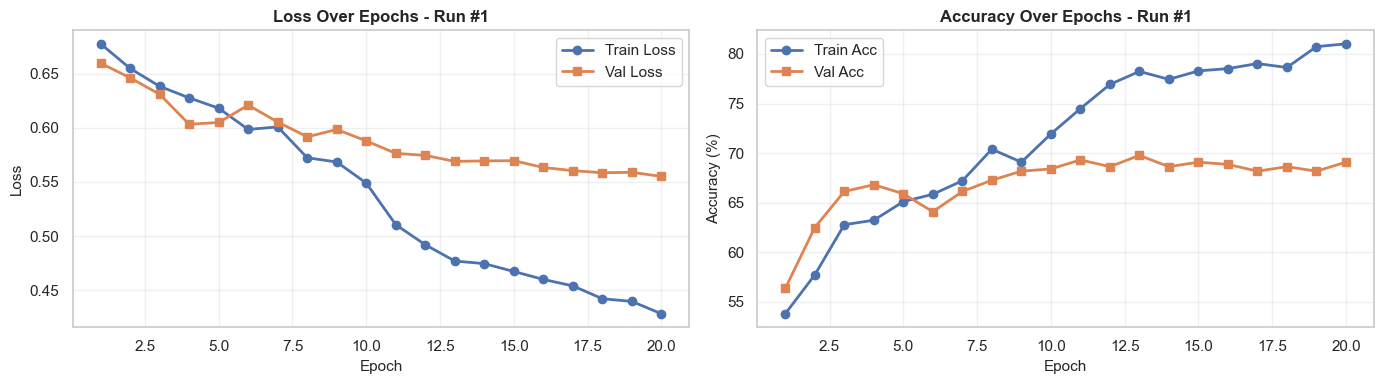




RUN #2: run-20251219_183432-9ou6x57u



,epoch,train_loss,train_acc,val_loss,val_acc,learning_rate,_timestamp
0,1.0,0.738861,57.102273,0.683386,62.500000,0.000100,1.766162e+09
1,2.0,0.671934,64.488636,0.684921,60.454545,0.000100,1.766162e+09
2,3.0,0.565566,71.647727,0.579039,71.363636,0.000100,1.766162e+09
3,4.0,0.513441,73.863636,0.599478,70.681818,0.000100,1.766162e+09
4,5.0,0.443216,80.000000,0.649361,71.363636,0.000100,1.766162e+09
5,6.0,0.385573,82.102273,0.667925,71.818182,0.000100,1.766162e+09
6,7.0,0.322845,86.136364,0.656162,71.363636,0.000100,1.766162e+09
7,8.0,0.257363,89.545455,0.651986,73.863636,0.000100,1.766162e+09
8,9.0,0.221618,91.022727,0.668586,72.045455,0.000100,1.766162e+09
9,10.0,0.202545,92.556818,0.888819,69.772727,0.000010,1.766162e+09


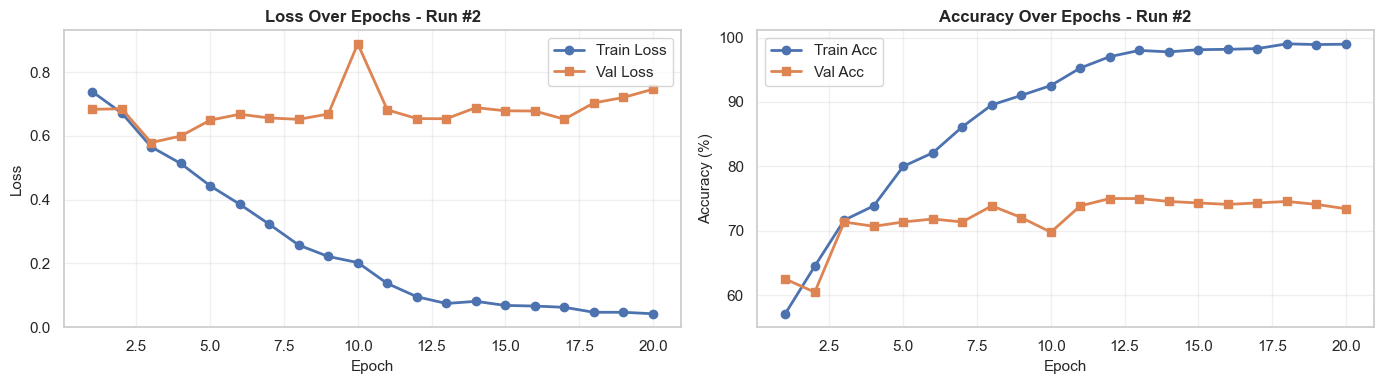




RUN #3: run-20251219_185512-nlg0husq



,epoch,train_loss,train_acc,val_loss,val_acc,learning_rate,_timestamp
0,1.0,1.238364,51.250000,0.694405,50.454545,0.00010,1.766163e+09
1,2.0,1.145049,51.590909,0.686402,52.272727,0.00010,1.766163e+09
2,3.0,1.031287,50.284091,0.699996,49.318182,0.00010,1.766163e+09
3,4.0,0.943170,50.738636,0.688676,51.818182,0.00010,1.766163e+09
4,5.0,0.875138,52.329545,0.694055,52.727273,0.00010,1.766163e+09
5,6.0,0.828471,51.988636,0.686003,53.409091,0.00010,1.766163e+09
6,7.0,0.812068,51.704545,0.686375,50.681818,0.00010,1.766163e+09
7,8.0,0.793266,51.818182,0.701790,50.000000,0.00010,1.766163e+09
8,9.0,0.786901,51.136364,0.680425,50.454545,0.00010,1.766163e+09
9,10.0,0.757956,50.852273,0.682598,51.590909,0.00001,1.766163e+09


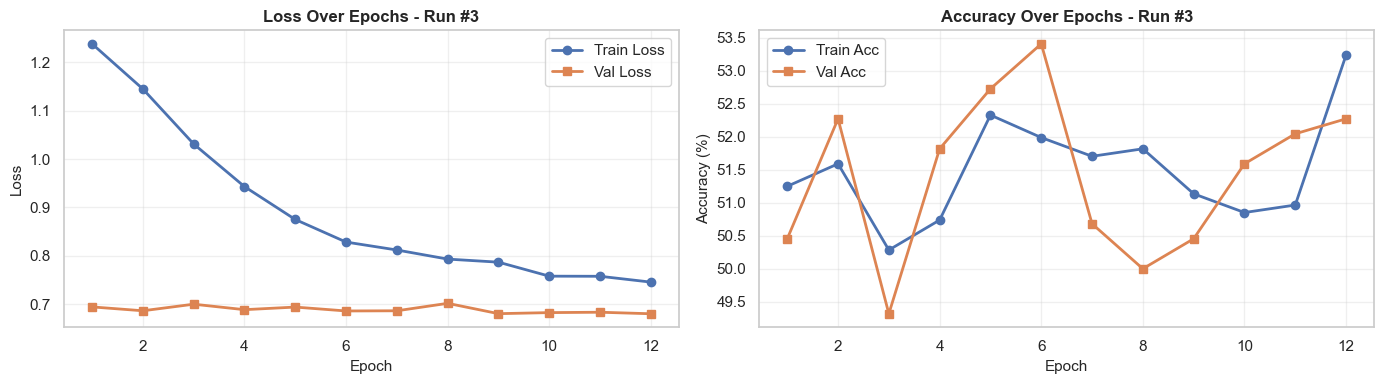




RUN #4: run-20251219_191944-5lh7ez2v



,epoch,train_loss,train_acc,val_loss,val_acc,learning_rate,_timestamp
0,1.0,0.752964,50.568182,0.690114,55.909091,0.000100,1.766165e+09
1,2.0,0.736065,50.340909,0.675192,58.181818,0.000100,1.766165e+09
2,3.0,0.720262,52.670455,0.676040,59.090909,0.000100,1.766165e+09
3,4.0,0.717295,52.159091,0.682951,55.909091,0.000100,1.766165e+09
4,5.0,0.711998,53.579545,0.678628,57.727273,0.000100,1.766165e+09
5,6.0,0.707007,54.772727,0.672584,59.090909,0.000100,1.766165e+09
6,7.0,0.699376,55.000000,0.663292,59.772727,0.000100,1.766165e+09
7,8.0,0.694685,56.363636,0.664567,58.636364,0.000100,1.766165e+09
8,9.0,0.697719,55.340909,0.662907,60.454545,0.000100,1.766165e+09
9,10.0,0.692995,55.625000,0.646445,61.590909,0.000010,1.766165e+09


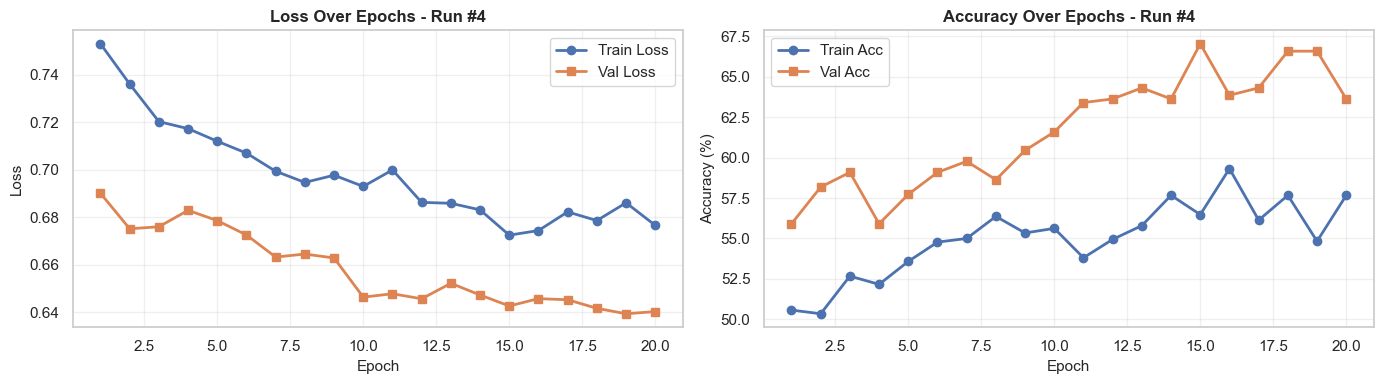




RUN #5: run-20251219_192927-rcjzlbbw



,epoch,train_loss,train_acc,val_loss,val_acc,learning_rate,_timestamp
0,1.0,0.677519,53.806818,0.659658,56.363636,0.000100,1.766165e+09
1,2.0,0.654783,57.727273,0.646137,62.500000,0.000100,1.766165e+09
2,3.0,0.638273,62.784091,0.630894,66.136364,0.000100,1.766165e+09
3,4.0,0.627617,63.238636,0.603213,66.818182,0.000100,1.766165e+09
4,5.0,0.618063,65.113636,0.604916,65.909091,0.000100,1.766165e+09
5,6.0,0.598477,65.852273,0.620868,64.090909,0.000100,1.766165e+09
6,7.0,0.600799,67.215909,0.605351,66.136364,0.000100,1.766165e+09
7,8.0,0.572334,70.397727,0.591642,67.272727,0.000100,1.766165e+09
8,9.0,0.568403,69.090909,0.598420,68.181818,0.000100,1.766165e+09
9,10.0,0.548940,71.931818,0.587911,68.409091,0.000010,1.766165e+09


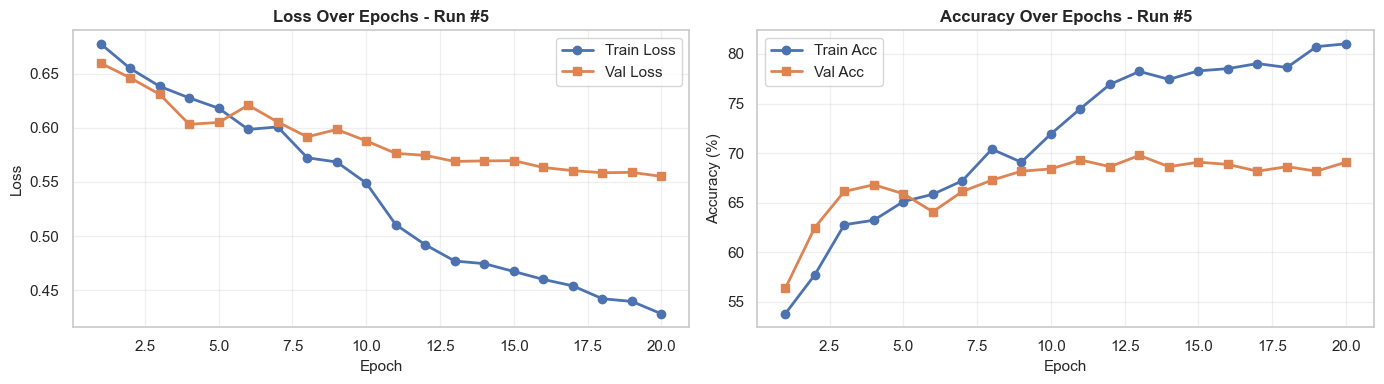




RUN #6: run-20251219_193848-hqnw88ut



,epoch,train_loss,train_acc,val_loss,val_acc,learning_rate,_timestamp
0,1.0,0.655661,61.420455,0.591475,70.909091,0.000100,1.766166e+09
1,2.0,0.592860,68.238636,0.540017,72.500000,0.000100,1.766166e+09
2,3.0,0.563851,70.795455,0.529446,74.090909,0.000100,1.766166e+09
3,4.0,0.513630,74.431818,0.475690,75.909091,0.000100,1.766166e+09
4,5.0,0.451996,78.465909,0.503509,73.863636,0.000100,1.766166e+09
5,6.0,0.382913,82.897727,0.543721,74.318182,0.000100,1.766166e+09
6,7.0,0.323958,86.534091,0.494783,76.818182,0.000100,1.766166e+09
7,8.0,0.283006,88.125000,0.517142,77.954545,0.000100,1.766166e+09
8,9.0,0.207389,92.215909,0.594580,76.818182,0.000100,1.766166e+09
9,10.0,0.194623,91.988636,0.606030,77.500000,0.000010,1.766166e+09


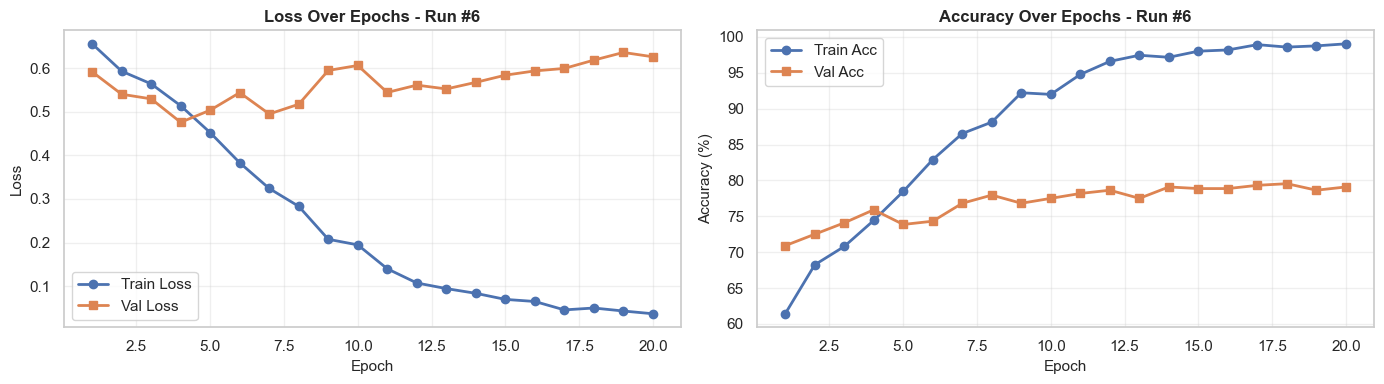




RUN #7: run-20251222_181017-i45ujl51



,epoch,train_loss,train_acc,val_loss,val_acc,learning_rate,_timestamp
0,1.0,0.716287,50.909091,0.664549,62.727273,0.000100,1.766420e+09
1,2.0,0.704007,51.079545,0.664679,63.863636,0.000100,1.766420e+09
2,3.0,0.686174,55.568182,0.642460,65.454545,0.000100,1.766420e+09
3,4.0,0.677715,54.602273,0.637588,65.227273,0.000100,1.766420e+09
4,5.0,0.688997,56.079545,0.632877,67.045455,0.000100,1.766420e+09
5,6.0,0.669908,58.465909,0.620352,65.681818,0.000100,1.766420e+09
6,7.0,0.668204,60.454545,0.628787,65.681818,0.000100,1.766420e+09
7,8.0,0.667922,58.693182,0.607510,67.272727,0.000100,1.766421e+09
8,9.0,0.661184,60.113636,0.598948,67.500000,0.000100,1.766421e+09
9,10.0,0.657883,61.931818,0.600576,67.272727,0.000010,1.766421e+09


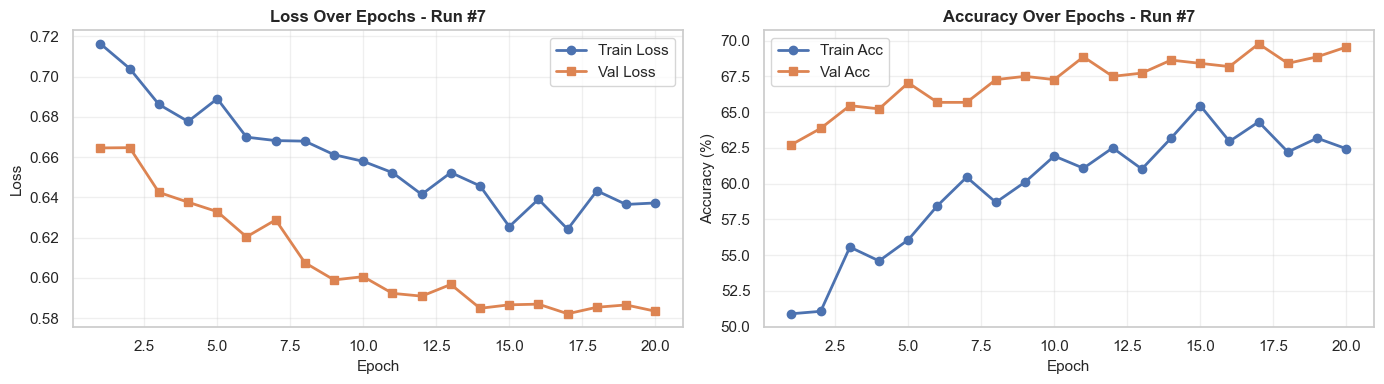




RUN #8: run-20251222_185539-e0bibsan



,epoch,train_loss,train_acc,val_loss,val_acc,learning_rate,_timestamp
0,1.0,0.707021,51.818182,0.659197,60.000000,0.000100,1.766423e+09
1,2.0,0.676746,58.750000,0.623705,66.363636,0.000100,1.766423e+09
2,3.0,0.666195,60.965909,0.599059,67.045455,0.000100,1.766423e+09
3,4.0,0.650454,63.806818,0.599506,66.590909,0.000100,1.766423e+09
4,5.0,0.632358,65.511364,0.575794,67.272727,0.000100,1.766423e+09
5,6.0,0.609454,67.159091,0.585871,70.000000,0.000100,1.766423e+09
6,7.0,0.601570,67.954545,0.576666,69.772727,0.000100,1.766423e+09
7,8.0,0.594991,67.954545,0.528968,73.409091,0.000100,1.766423e+09
8,9.0,0.577067,69.886364,0.536204,72.500000,0.000100,1.766423e+09
9,10.0,0.570753,70.795455,0.534143,72.727273,0.000010,1.766423e+09


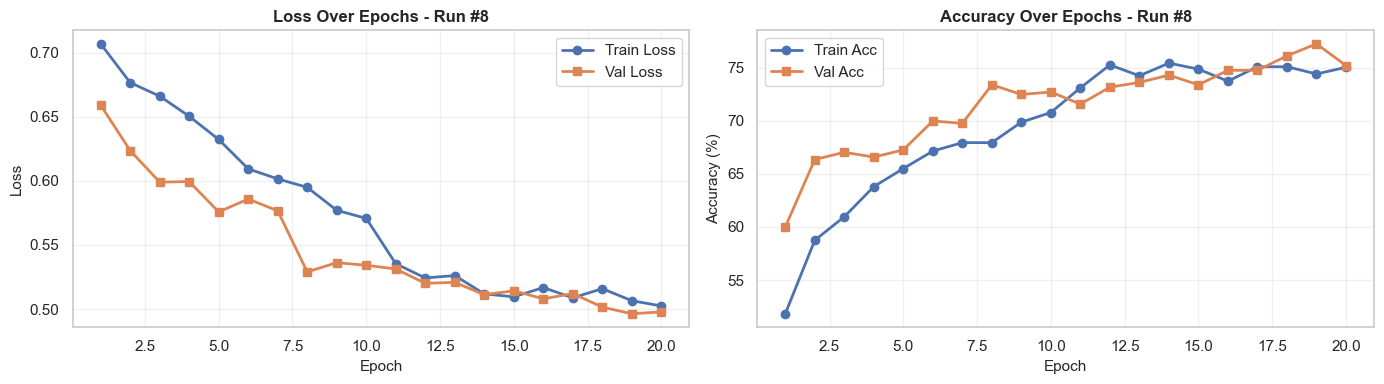

In [18]:
# Display per-epoch data for each run
for idx, (run_id, epoch_data) in enumerate(per_epoch_data.items()):
    print(f"\n{'=' * 100}")
    print(f"RUN #{idx + 1}: {run_id}")
    print(f"{'=' * 100}\n")
    
    # Display the epoch-by-epoch data
    display(epoch_data)
    
    # Plot training curves for this specific run
    if len(epoch_data) > 0 and 'epoch' in epoch_data.columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 4))
        
        # Loss plot
        if 'train_loss' in epoch_data.columns:
            axes[0].plot(epoch_data['epoch'], epoch_data['train_loss'], 'o-', label='Train Loss', linewidth=2)
        if 'val_loss' in epoch_data.columns:
            axes[0].plot(epoch_data['epoch'], epoch_data['val_loss'], 's-', label='Val Loss', linewidth=2)
        axes[0].set_xlabel('Epoch', fontsize=11)
        axes[0].set_ylabel('Loss', fontsize=11)
        axes[0].set_title(f'Loss Over Epochs - Run #{idx + 1}', fontsize=12, fontweight='bold')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Accuracy plot
        if 'train_acc' in epoch_data.columns:
            axes[1].plot(epoch_data['epoch'], epoch_data['train_acc'], 'o-', label='Train Acc', linewidth=2)
        if 'val_acc' in epoch_data.columns:
            axes[1].plot(epoch_data['epoch'], epoch_data['val_acc'], 's-', label='Val Acc', linewidth=2)
        axes[1].set_xlabel('Epoch', fontsize=11)
        axes[1].set_ylabel('Accuracy (%)', fontsize=11)
        axes[1].set_title(f'Accuracy Over Epochs - Run #{idx + 1}', fontsize=12, fontweight='bold')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print("\n")